In [1]:
#importing important package 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
 
import seaborn as sns
 
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
 
import sklearn 
import sklearn.datasets 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import precision_recall_fscore_support 
from sklearn.neural_network import MLPClassifier 
from sklearn.ensemble import RandomForestClassifier

# October Dataset

In [2]:
#importing october dataset
train=pd.read_csv('Campaign2_NC_oct.csv')

C:\Users\DELL\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#showing information regarding dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23099 entries, 0 to 23098
Data columns (total 38 columns):
Month                      23099 non-null object
ID                         23099 non-null int64
created_time               0 non-null float64
Interested_in              17068 non-null object
Name                       23099 non-null object
Email                      23099 non-null object
RegisteredEmail            0 non-null float64
City                       23097 non-null object
Phone                      23099 non-null object
Mobile                     23099 non-null object
AppointmentDate            0 non-null float64
AppointmentTime            0 non-null float64
PANno                      0 non-null float64
Adset                      0 non-null float64
IPAddress                  23099 non-null object
Referer                    23099 non-null object
Campaign                   22009 non-null object
Dateadded                  23099 non-null object
Dispostion_Status          0

In [4]:
#showing 5 rows from the top
train.head()

,Month,ID,created_time,Interested_in,Name,Email,RegisteredEmail,City,Phone,Mobile,...,Turnover,Loan_Amount,Branch_Name,gclid,ZeroBalanceSavings,Tellecaller,Mobile No,Disposition,Disp,Attempts
0,Oct,943633,NaN,",Credit Card",1c084c7e0f88642020fe9c3840084633bbc0bcd4cddf4e...,743f17c2426ddf31e0eb3a2890289f24de503f4632c755...,NaN,Ratlam,1b4cefb021d6735ea3f799d7cdbbc70cc860f427fd148d...,e1f4b2892992708fed061ae6665cb01ca7b25a5ec2ae60...,...,NaN,NaN,NaN,NaN,NaN,NaN,e1f4b2892992708fed061ae6665cb01ca7b25a5ec2ae60...,Not Contactable,NC,11
1,Oct,943632,NaN,",Credit Card,Loans,Current Account,Trading Acc...",b5b52f8897d09cc42bc72b3ec9cabbe2573db80b41130d...,77a8bed794f09e0d703566483473ece2c893f974e1fc7d...,NaN,Jaipur,bae49e7fdd419048231f22c20056e94c24e670120e81fb...,bae49e7fdd419048231f22c20056e94c24e670120e81fb...,...,NaN,NaN,NaN,NaN,NaN,NaN,bae49e7fdd419048231f22c20056e94c24e670120e81fb...,Not Contactable,NC,11
2,Oct,943631,NaN,NaN,eec2cc10c7b4f3f743d795fa3c24f5a7b59c988215789d...,9f58fedf33ea8dfe92aa962364c428aaa1e11049e508bb...,NaN,Varanasi,3126005344dec2fcacec46e16db2abd2ac732b51264ca6...,a2832b9c900abf8c5d71fb25fff228176e94fff4ed7306...,...,NaN,NaN,NaN,CjwKCAjwpeXeBRA6EiwAyoJPKsJnBgzZCqPNsJm5axtS8T...,NaN,NaN,a2832b9c900abf8c5d71fb25fff228176e94fff4ed7306...,Not Contactable,NC,11
3,Oct,943627,NaN,",Credit Card",92910388b8845a8e2df9a8ff074fe86a72d191620f2e81...,c2d35e013ef207af1569943de2b8e59d6ed85598f8f472...,NaN,Gurgaon,35ed59ae911d8502852880798a16fcc926d423036bf6a9...,0f03eb9effc0f42d58e444fcf5ed9f34f57aaeae391975...,...,NaN,NaN,NaN,NaN,NaN,NaN,0f03eb9effc0f42d58e444fcf5ed9f34f57aaeae391975...,Not Contactable,NC,11
4,Oct,943622,NaN,NaN,f84be7df3861f2014eb9f376f09f2e828a0433727abc0e...,dde8583c865c4656f65c8366f2ef4fb7b0557a0f11ff1e...,NaN,Thiruvananthapuram,3126005344dec2fcacec46e16db2abd2ac732b51264ca6...,c87f1a780b9e6fa6ebaa6fccb8b1faac3f17bf8b2c15e9...,...,NaN,NaN,NaN,NaN,I agree to maintain a minimum monthly balance ...,NaN,c87f1a780b9e6fa6ebaa6fccb8b1faac3f17bf8b2c15e9...,Not Contactable,NC,11


In [5]:
#showing 5 rows from the bottom
train.tail()

,Month,ID,created_time,Interested_in,Name,Email,RegisteredEmail,City,Phone,Mobile,...,Turnover,Loan_Amount,Branch_Name,gclid,ZeroBalanceSavings,Tellecaller,Mobile No,Disposition,Disp,Attempts
23094,Oct,894139,NaN,",Loans",16ad6ff60ccac6dfcab749d74ada2e168d973249b57ab9...,169e19fd5cbf4fc98254eabc428ff7a3d64a622fcd4aef...,NaN,Sangli,3126005344dec2fcacec46e16db2abd2ac732b51264ca6...,4402a99300b7295ddd94714caec284b7f651fa25c0235f...,...,NaN,NaN,NaN,NaN,I agree to maintain a minimum monthly balance ...,NaN,4402a99300b7295ddd94714caec284b7f651fa25c0235f...,Not Contactable,NC,10
23095,Oct,894138,NaN,NaN,f07ca317a9a54377749cdd08183910b46c68a559874599...,1efe0b05208acef4bafd321e84745ae968310a4a6fdf2a...,NaN,Bangalore,3126005344dec2fcacec46e16db2abd2ac732b51264ca6...,745ceb1e3ee89f32dc1436ab22ec08958c1cf9dd3eaef4...,...,NaN,NaN,NaN,NaN,I agree to maintain a minimum monthly balance ...,NaN,745ceb1e3ee89f32dc1436ab22ec08958c1cf9dd3eaef4...,Not Contactable,NC,10
23096,Oct,894136,NaN,",Credit Card",fcc51a7bf51e679d0f161dc6d66fbc8c9e4a8b69daefdb...,ce1a5544a72aeb15a224f130f804e9ac7cfc29395d0e40...,NaN,Faridabad,53fe2c85539eb73a4316372f6b88adc308cdcf784ba6d2...,53fe2c85539eb73a4316372f6b88adc308cdcf784ba6d2...,...,NaN,NaN,NaN,NaN,I agree to maintain a minimum monthly balance ...,NaN,53fe2c85539eb73a4316372f6b88adc308cdcf784ba6d2...,Customer Disconnected,Customer Disconnected,10
23097,Oct,894135,NaN,",Credit Card",41ed0a698395532771d2fc6b8e2e7a767628485fb36831...,07ab1faac1a53f6dfac7a05f5519f187e2634494427f38...,NaN,Jaipur,7bdfc669a2ffb3dc4d9deb0dfc8054044003fa7c70933a...,7bdfc669a2ffb3dc4d9deb0dfc8054044003fa7c70933a...,...,NaN,NaN,NaN,CjwKCAiAxJPVBRB4EiwAsCA4af5bsGGOgP5hApdqD4S_r3...,I agree to maintain a minimum monthly balance ...,NaN,7bdfc669a2ffb3dc4d9deb0dfc8054044003fa7c70933a...,Not Contactable-Busy,NC,10
23098,Oct,894123,NaN,",Current Account",7f0a7b9f2eabe020a0062472e6db8aa8043e7952a75fab...,d050939a2cb64b077224c14f53a73afbb16874edcb92c1...,NaN,Fatehgarh,3126005344dec2fcacec46e16db2abd2ac732b51264ca6...,dfe2b432ad7f8bfb88c96a7395af80deae25efb9bd65e1...,...,NaN,NaN,NaN,NaN,I agree to maintain a minimum monthly balance ...,NaN,dfe2b432ad7f8bfb88c96a7395af80deae25efb9bd65e1...,Customer Disconnected,Customer Disconnected,10


In [6]:
#desription of the dataset
train.describe(include='all')

,Month,ID,created_time,Interested_in,Name,Email,RegisteredEmail,City,Phone,Mobile,...,Turnover,Loan_Amount,Branch_Name,gclid,ZeroBalanceSavings,Tellecaller,Mobile No,Disposition,Disp,Attempts
count,23099,23099.000000,0.0,17068,23099,23099,0.0,23097,23099,23099,...,0.0,0.0,0.0,2656,12772,0.0,23099,23099,23099,23099.000000
unique,1,NaN,NaN,31,19787,22483,NaN,328,8410,22316,...,NaN,NaN,NaN,2623,1,NaN,22316,12,2,NaN
top,Oct,NaN,NaN,Saving Account,af732279d0ded02b3e41a24c44062106877b2e28461fc6...,3fa16fa882c09047b529222ed2c0653d22b26124908859...,NaN,New Delhi,3126005344dec2fcacec46e16db2abd2ac732b51264ca6...,4762880bdf2edc7518f6067e77aab557565a4d45829163...,...,NaN,NaN,NaN,CjwKCAiAxJPVBRB4EiwAsCA4af5bsGGOgP5hApdqD4S_r3...,I agree to maintain a minimum monthly balance ...,NaN,4762880bdf2edc7518f6067e77aab557565a4d45829163...,Not Contactable,NC,NaN
freq,23099,NaN,NaN,3295,37,8,NaN,3957,14515,5,...,NaN,NaN,NaN,4,12772,NaN,5,16981,21860,NaN
mean,NaN,917964.901944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.490368
std,NaN,14439.877429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500697
min,NaN,894123.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000
25%,NaN,905591.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
50%,NaN,917013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
75%,NaN,930737.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000


In [7]:
#Showing columns which have null entries in them in descending order
train.isnull().sum().sort_values(ascending=False)

Dispostion_Status          23099
Country                    23099
AppointmentDate            23099
AppointmentTime            23099
PANno                      23099
Adset                      23099
RegisteredEmail            23099
Dateupdated                23099
Remark                     23099
Call_Back_Date             23099
Contactable                23099
Product                    23099
Alternate_Mobile_Number    23099
Country_Code               23099
Age_of_Company             23099
Turnover                   23099
Loan_Amount                23099
Branch_Name                23099
Tellecaller                23099
created_time               23099
gclid                      20443
ZeroBalanceSavings         10327
Interested_in               6031
Campaign                    1090
City                           2
Phone                          0
Name                           0
Email                          0
ID                             0
Attempts                       0
Mobile    

In [8]:
#Showing number of mention of each  cities 
train['City'].value_counts().head(200)

New Delhi        3957
Bangalore        1171
Hyderabad        1132
Mumbai           1013
Pune              759
East Delhi        607
Chennai           600
Kolkata           435
Agra              415
Patna             401
Ahmedabad         384
Surat             315
Jaipur            301
Bilaspur          278
Gurgaon           265
Lucknow           243
Bhubhaneshwar     225
Noida             214
Aurangabad        200
Ghaziabad         194
Allahabad         181
Coimbatore        164
Tiruppur          164
Bhopal            159
Faridabad         154
Alwar             143
Warangal          140
Thane             139
Vijayawada        136
Varanasi          135
                 ... 
Jamnagar           21
Mohali             21
Mandsaur           20
Koppal             20
Nadiad             20
Suryapet           20
Dewas              19
Kottayam           19
Gandhinagar        19
Hanumangarh        19
Kollam             19
Yadgir             19
Ferozepur          19
Roorkee            18
Mewat     

In [9]:
#Storing cities into a new variable
cities=train['City'].value_counts()
cities.shape

(328,)

In [10]:
#Showing number of times each city is mention
print(cities)

New Delhi                    3957
Bangalore                    1171
Hyderabad                    1132
Mumbai                       1013
Pune                          759
East Delhi                    607
Chennai                       600
Kolkata                       435
Agra                          415
Patna                         401
Ahmedabad                     384
Surat                         315
Jaipur                        301
Bilaspur                      278
Gurgaon                       265
Lucknow                       243
Bhubhaneshwar                 225
Noida                         214
Aurangabad                    200
Ghaziabad                     194
Allahabad                     181
Coimbatore                    164
Tiruppur                      164
Bhopal                        159
Faridabad                     154
Alwar                         143
Warangal                      140
Thane                         139
Vijayawada                    136
Varanasi      

In [11]:
#Showing disposition column
train['Disposition'].value_counts()

Not Contactable                                         16981
Not Contactable-Ringing No Response                      1730
Customer Disconnected                                    1239
Not Contactable-Not reachable / Switched Off             1123
Not Contactable-Busy                                     1084
Wrong Number                                              368
Not Contactable-Number temporary Not in Service           182
Not Contactable-Wrong Number / Number does not exist      139
Not Contactable-Language Barrier                          123
Switched Off                                              121
CDR disposition-Not Contactable-Ringing No Response         6
OCM Disposition- Not contactable                            3
Name: Disposition, dtype: int64

In [12]:
#minimizing the table into some related columns which has not encryption value
x=train[['ID','Interested_in','City','Referer','Campaign','Disposition','Attempts']]

In [13]:
x.shape

(23099, 7)

In [14]:
#showing the number of null values in each column in descending order
x.isnull().sum().sort_values(ascending=False)

Interested_in    6031
Campaign         1090
City                2
Attempts            0
Disposition         0
Referer             0
ID                  0
dtype: int64

In [15]:
x=x[x.City.notnull()]

In [16]:
x.isnull().sum().sort_values(ascending=False)

Interested_in    6031
Campaign         1090
Attempts            0
Disposition         0
Referer             0
City                0
ID                  0
dtype: int64

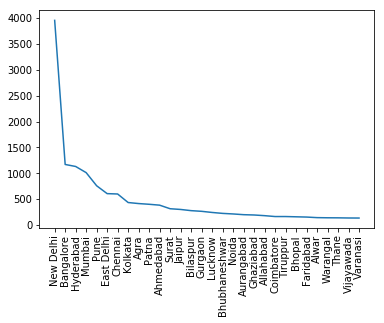

In [17]:
#Graph showing the number of times each city(subset) has been mention
#lineplot
plt.plot(x.City.value_counts().head(30))
plt.xticks(rotation='vertical')
plt.show()

In [18]:
cities1=cities[:100]

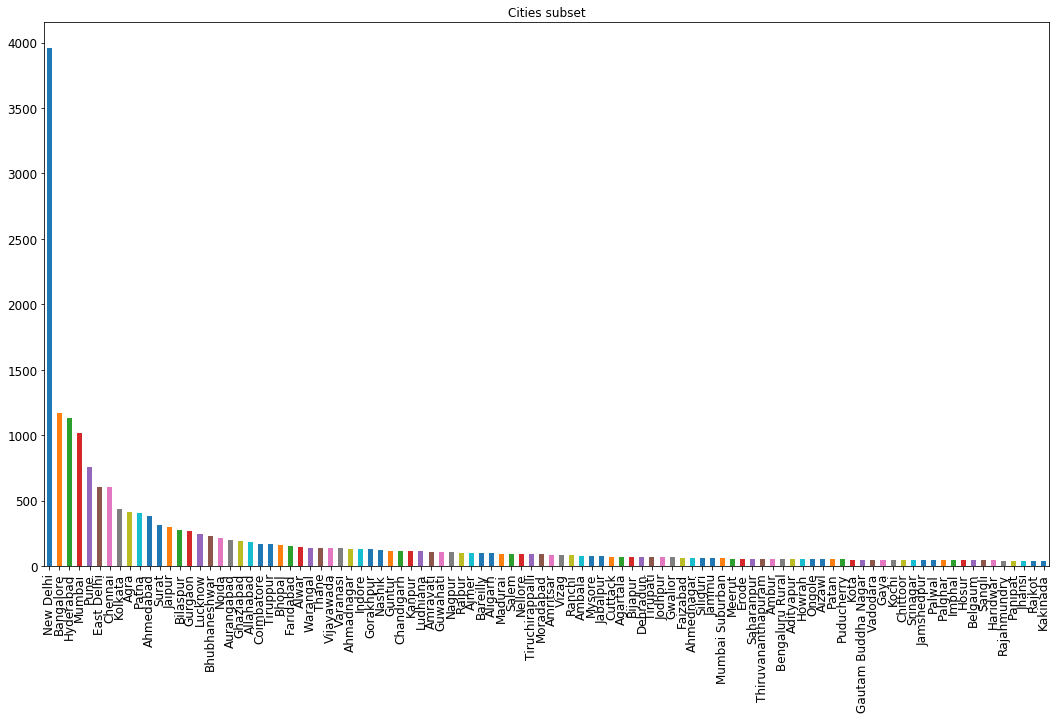

In [19]:
#showing how many times a city (subset)has been appeared in the city column
#barplot
cities1.plot.bar(rot=90, title='Cities subset', figsize=(18,10), fontsize=12)

# Loading all the dataset

In [20]:
df_w = pd.read_csv('Website2_NC.csv')
df_o = pd.read_csv('Campaign2_NC_oct.csv')
df_n = pd.read_csv('Campaign2_NC_nov.csv')
df_d = pd.read_csv('Campaign2_NC_dec.csv')

C:\Users\DELL\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (54,65,66,119,137,235) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\DELL\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Website2_NC data

In [21]:
#Showing columns which have null entries in them in descending order
df_w.notnull().sum().sort_values(ascending=False)

Attempt                         22353
Manual                          22353
Disp                            22353
Last Name                       22353
Lead Id                         22353
Lead Qualification Required?    22353
Lead Qualified?                 22353
leadstatuswf                    22353
Level 3 Escalation TAT Flag     22353
Level2 Escalation TAT Flag      22353
Marketing Material              22353
Sales Stage Code                22353
Merged                          22353
Mobile Phone                    22353
Modified On                     22353
Next Action Date TAT Flag       22353
Owned Team                      22353
Owner                           22353
Preferred Method of Contact     22353
Priority                        22353
First Name                      22353
Existing Customer               22353
Evaluate Fit                    22353
Email                           22353
Additional Info                 22353
Address 1: Address Type         22353
Address 1: S

In [22]:
#Removing cloumn which contain only  null enteries 
df_w=df_w.dropna(how='all',axis='columns')
df_w

,Name,Additional Info,Address 1,Address 1: Address Type,Address 1: Shipping Method,Address 2: Address Type,Address 2: Shipping Method,Alternate No.,Auto Created?,BU,...,Sub Source,System Modified By,Transaction not done,Vymo Status,Yomi Full Name,Month,Proper Mobile,Disposition,Disp,Attempt
0,30e6e7e5710d7a94143752568371c017a717b148c47091...,No,NaN,Default Value,Default Value,Default Value,Default Value,29ec482aa070bc9b58f19c75d387f933856eb5d0909959...,No,NaN,...,Mobile Banking,CRM Function PROD,No,NaN,30e6e7e5710d7a94143752568371c017a717b148c47091...,Oct'18,44ba09eeb0e2e652b70710bae6be924f36040268f54040...,Customer Disconnected,Customer Disconnected,8
1,e40af3d2176047c5993e2684ecd91c02a7fed7942e96df...,No,NaN,Default Value,Default Value,Default Value,Default Value,5ac25dc1d77173e4e689d923cb9df28a71eba70540e992...,No,NaN,...,Website,CRM Function PROD,No,NaN,e40af3d2176047c5993e2684ecd91c02a7fed7942e96df...,Oct'18,5ac25dc1d77173e4e689d923cb9df28a71eba70540e992...,Customer Disconnected,Customer Disconnected,8
2,43e5d7aeb8e8ce64fb7977b5f26e3c3c7b510b2bcf8ee2...,No,NaN,Default Value,Default Value,Default Value,Default Value,29ec482aa070bc9b58f19c75d387f933856eb5d0909959...,No,NaN,...,Mobile Banking,CRM Function PROD,No,NaN,43e5d7aeb8e8ce64fb7977b5f26e3c3c7b510b2bcf8ee2...,Oct'18,19234cee9d7abca9b76748713e907fb46e444da3041944...,Customer Disconnected,Customer Disconnected,8
3,43e5d7aeb8e8ce64fb7977b5f26e3c3c7b510b2bcf8ee2...,No,NaN,Default Value,Default Value,Default Value,Default Value,29ec482aa070bc9b58f19c75d387f933856eb5d0909959...,No,NaN,...,Mobile Banking,CRM Function PROD,No,NaN,43e5d7aeb8e8ce64fb7977b5f26e3c3c7b510b2bcf8ee2...,Oct'18,19234cee9d7abca9b76748713e907fb46e444da3041944...,Customer Disconnected,Customer Disconnected,8
4,74644b6d600c39c2025f02243a55bb96fd8678a59b596b...,No,NaN,Default Value,Default Value,Default Value,Default Value,29ec482aa070bc9b58f19c75d387f933856eb5d0909959...,No,NaN,...,Mobile Banking,CRM Function PROD,No,NaN,74644b6d600c39c2025f02243a55bb96fd8678a59b596b...,Oct'18,88c71030c091981014efa50eb2df6876ae0e613a3e20c4...,Customer Disconnected,Customer Disconnected,8
5,9c71f60e08301b2299450eef02da37c39d52c0719c23be...,No,NaN,Default Value,Default Value,Default Value,Default Value,29ec482aa070bc9b58f19c75d387f933856eb5d0909959...,No,NaN,...,Website,CRM Function PROD,No,NaN,9c71f60e08301b2299450eef02da37c39d52c0719c23be...,Oct'18,50ba76b3fce2747e75ad40988c37f71bcbe2c5b52e9fe2...,Customer Disconnected,Customer Disconnected,8
6,98d9dd0cb0baeed664ecb5258a746f540c48ab6e56d4d9...,No,NaN,Default Value,Default Value,Default Value,Default Value,dd58fa90edbd7d9381104c9d1a632cd372116cd364c1c4...,No,NaN,...,Website,CRM Function PROD,No,NaN,98d9dd0cb0baeed664ecb5258a746f540c48ab6e56d4d9...,Oct'18,dd58fa90edbd7d9381104c9d1a632cd372116cd364c1c4...,Customer Disconnected,Customer Disconnected,8
7,98d9dd0cb0baeed664ecb5258a746f540c48ab6e56d4d9...,No,NaN,Default Value,Default Value,Default Value,Default Value,dd58fa90edbd7d9381104c9d1a632cd372116cd364c1c4...,No,NaN,...,Website,CRM Function PROD,No,NaN,98d9dd0cb0baeed664ecb5258a746f540c48ab6e56d4d9...,Oct'18,dd58fa90edbd7d9381104c9d1a632cd372116cd364c1c4...,Customer Disconnected,Customer Disconnected,8
8,2894852dcf8a23def6df607e4242bec741468d523ca3f1...,No,NaN,Default Value,Default Value,Default Value,Default Value,29ec482aa070bc9b58f19c75d387f933856eb5d0909959...,No,NaN,...,Website,CRM Function PROD,No,NaN,2894852dcf8a23def6df607e4242bec741468d523ca3f1...,Oct'18,b1be5439b17e4e1448acd220ae9eeaf50fb6490e9c81e1...,Customer Disconnected,Customer Disconnected,8
9,581f061f9d7c1d20ac9335f01e085bdb7ec691c53ac024...,No,NaN,Default Value,Default Value,Default Value,Default Value,29ec482aa070bc9b58f19c75d387f933856eb5d0909959...,No,NaN,...,Website,CRM Function PROD,No,NaN,581f061f9d7c1d20ac9335f01e085bdb7ec691c53ac024...,Oct'18,dd3504ec3b14016f2c4d8b364ab4c5c3ccfa04bad7a21b...,Customer Disconnected,Customer Disconnected,8


In [23]:
#Showing column having non-null enteries
df_w.notnull().sum()

Name                           22353
Additional Info                22353
Address 1                         33
Address 1: Address Type        22353
Address 1: Shipping Method     22353
Address 2: Address Type        22353
Address 2: Shipping Method     22353
Alternate No.                  22353
Auto Created?                  22353
BU                                 2
Cash not dispensed             22353
City                              10
City.1                            10
Confirm Interest               22353
Country/ Parent Region            49
Created By                     22353
Created On                     22353
Customer ID                      134
Decision Maker?                22353
Description                     7513
Do not allow Bulk Emails       22353
Do not allow Emails            22353
Do not allow Faxes             22353
Do not allow Mails             22353
Do not allow Phone Calls       22353
Email                          22353
Evaluate Fit                   22353
E

In [24]:
#describing the dataset
df_w.describe(include='all')

,Name,Additional Info,Address 1,Address 1: Address Type,Address 1: Shipping Method,Address 2: Address Type,Address 2: Shipping Method,Alternate No.,Auto Created?,BU,...,Sub Source,System Modified By,Transaction not done,Vymo Status,Yomi Full Name,Month,Proper Mobile,Disposition,Disp,Attempt
count,22353,22353,33,22353,22353,22353,22353,22353,22353,2,...,22353,22353,22353,1,22353,22353,22353,22353,22353,22353.000000
unique,18084,1,13,1,1,1,1,2735,1,1,...,3,3,1,1,18084,3,18450,13,2,NaN
top,5d9cff6fc881104e5b4a2420ad6de27820e1fb251decd8...,No,Maharashtra,Default Value,Default Value,Default Value,Default Value,29ec482aa070bc9b58f19c75d387f933856eb5d0909959...,No,Sales Alternate Channel,...,Mobile Banking,Dynamic CRM,No,Successfully saved,5d9cff6fc881104e5b4a2420ad6de27820e1fb251decd8...,Dec'18,e6a5cab940bc2e6f8691c79c2c0a1de18fcf8a715810ea...,Not Contactable,NC,NaN
freq,26,22353,10,22353,22353,22353,22353,19364,22353,2,...,12747,17670,22353,1,26,7729,27,13943,20045,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.225473
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.002806
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000


In [25]:
#Making the table sort by including columns which has non-null entries and non-encryptrd entries which might be related to disposition column
df_w=df_w.drop(['Additional Info','Address 1: Address Type','Address 1: Shipping Method','Address 2: Address Type','Address 2: Shipping Method','Auto Created?'],1)
df_w.describe(include='all')

,Name,Address 1,Alternate No.,BU,Cash not dispensed,City,City.1,Confirm Interest,Country/ Parent Region,Created By,...,Sub Source,System Modified By,Transaction not done,Vymo Status,Yomi Full Name,Month,Proper Mobile,Disposition,Disp,Attempt
count,22353,33,22353,2,22353,10,10,22353,49,22353,...,22353,22353,22353,1,22353,22353,22353,22353,22353,22353.000000
unique,18084,13,2735,1,1,9,9,1,5,1,...,3,3,1,1,18084,3,18450,13,2,NaN
top,5d9cff6fc881104e5b4a2420ad6de27820e1fb251decd8...,Maharashtra,29ec482aa070bc9b58f19c75d387f933856eb5d0909959...,Sales Alternate Channel,No,CHENNAI,CHENNAI,Yes,India,Dynamic CRM,...,Mobile Banking,Dynamic CRM,No,Successfully saved,5d9cff6fc881104e5b4a2420ad6de27820e1fb251decd8...,Dec'18,e6a5cab940bc2e6f8691c79c2c0a1de18fcf8a715810ea...,Not Contactable,NC,NaN
freq,26,10,19364,2,22353,2,2,22353,43,22353,...,12747,17670,22353,1,26,7729,27,13943,20045,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.225473
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.002806
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.000000


In [26]:
#Removing rows which contain only null values
df_w=df_w.dropna(how='all',axis='rows')
df_w

,Name,Address 1,Alternate No.,BU,Cash not dispensed,City,City.1,Confirm Interest,Country/ Parent Region,Created By,...,Sub Source,System Modified By,Transaction not done,Vymo Status,Yomi Full Name,Month,Proper Mobile,Disposition,Disp,Attempt
0,30e6e7e5710d7a94143752568371c017a717b148c47091...,NaN,29ec482aa070bc9b58f19c75d387f933856eb5d0909959...,NaN,No,NaN,NaN,Yes,NaN,Dynamic CRM,...,Mobile Banking,CRM Function PROD,No,NaN,30e6e7e5710d7a94143752568371c017a717b148c47091...,Oct'18,44ba09eeb0e2e652b70710bae6be924f36040268f54040...,Customer Disconnected,Customer Disconnected,8
1,e40af3d2176047c5993e2684ecd91c02a7fed7942e96df...,NaN,5ac25dc1d77173e4e689d923cb9df28a71eba70540e992...,NaN,No,NaN,NaN,Yes,NaN,Dynamic CRM,...,Website,CRM Function PROD,No,NaN,e40af3d2176047c5993e2684ecd91c02a7fed7942e96df...,Oct'18,5ac25dc1d77173e4e689d923cb9df28a71eba70540e992...,Customer Disconnected,Customer Disconnected,8
2,43e5d7aeb8e8ce64fb7977b5f26e3c3c7b510b2bcf8ee2...,NaN,29ec482aa070bc9b58f19c75d387f933856eb5d0909959...,NaN,No,NaN,NaN,Yes,NaN,Dynamic CRM,...,Mobile Banking,CRM Function PROD,No,NaN,43e5d7aeb8e8ce64fb7977b5f26e3c3c7b510b2bcf8ee2...,Oct'18,19234cee9d7abca9b76748713e907fb46e444da3041944...,Customer Disconnected,Customer Disconnected,8
3,43e5d7aeb8e8ce64fb7977b5f26e3c3c7b510b2bcf8ee2...,NaN,29ec482aa070bc9b58f19c75d387f933856eb5d0909959...,NaN,No,NaN,NaN,Yes,NaN,Dynamic CRM,...,Mobile Banking,CRM Function PROD,No,NaN,43e5d7aeb8e8ce64fb7977b5f26e3c3c7b510b2bcf8ee2...,Oct'18,19234cee9d7abca9b76748713e907fb46e444da3041944...,Customer Disconnected,Customer Disconnected,8
4,74644b6d600c39c2025f02243a55bb96fd8678a59b596b...,NaN,29ec482aa070bc9b58f19c75d387f933856eb5d0909959...,NaN,No,NaN,NaN,Yes,NaN,Dynamic CRM,...,Mobile Banking,CRM Function PROD,No,NaN,74644b6d600c39c2025f02243a55bb96fd8678a59b596b...,Oct'18,88c71030c091981014efa50eb2df6876ae0e613a3e20c4...,Customer Disconnected,Customer Disconnected,8
5,9c71f60e08301b2299450eef02da37c39d52c0719c23be...,NaN,29ec482aa070bc9b58f19c75d387f933856eb5d0909959...,NaN,No,NaN,NaN,Yes,NaN,Dynamic CRM,...,Website,CRM Function PROD,No,NaN,9c71f60e08301b2299450eef02da37c39d52c0719c23be...,Oct'18,50ba76b3fce2747e75ad40988c37f71bcbe2c5b52e9fe2...,Customer Disconnected,Customer Disconnected,8
6,98d9dd0cb0baeed664ecb5258a746f540c48ab6e56d4d9...,NaN,dd58fa90edbd7d9381104c9d1a632cd372116cd364c1c4...,NaN,No,NaN,NaN,Yes,NaN,Dynamic CRM,...,Website,CRM Function PROD,No,NaN,98d9dd0cb0baeed664ecb5258a746f540c48ab6e56d4d9...,Oct'18,dd58fa90edbd7d9381104c9d1a632cd372116cd364c1c4...,Customer Disconnected,Customer Disconnected,8
7,98d9dd0cb0baeed664ecb5258a746f540c48ab6e56d4d9...,NaN,dd58fa90edbd7d9381104c9d1a632cd372116cd364c1c4...,NaN,No,NaN,NaN,Yes,NaN,Dynamic CRM,...,Website,CRM Function PROD,No,NaN,98d9dd0cb0baeed664ecb5258a746f540c48ab6e56d4d9...,Oct'18,dd58fa90edbd7d9381104c9d1a632cd372116cd364c1c4...,Customer Disconnected,Customer Disconnected,8
8,2894852dcf8a23def6df607e4242bec741468d523ca3f1...,NaN,29ec482aa070bc9b58f19c75d387f933856eb5d0909959...,NaN,No,NaN,NaN,Yes,NaN,Dynamic CRM,...,Website,CRM Function PROD,No,NaN,2894852dcf8a23def6df607e4242bec741468d523ca3f1...,Oct'18,b1be5439b17e4e1448acd220ae9eeaf50fb6490e9c81e1...,Customer Disconnected,Customer Disconnected,8
9,581f061f9d7c1d20ac9335f01e085bdb7ec691c53ac024...,NaN,29ec482aa070bc9b58f19c75d387f933856eb5d0909959...,NaN,No,NaN,NaN,Yes,NaN,Dynamic CRM,...,Website,CRM Function PROD,No,NaN,581f061f9d7c1d20ac9335f01e085bdb7ec691c53ac024...,Oct'18,dd3504ec3b14016f2c4d8b364ab4c5c3ccfa04bad7a21b...,Customer Disconnected,Customer Disconnected,8


In [27]:
#Showing column with number of  non-null enties
df_w.notnull().sum()

Name                            22353
Address 1                          33
Alternate No.                   22353
BU                                  2
Cash not dispensed              22353
City                               10
City.1                             10
Confirm Interest                22353
Country/ Parent Region             49
Created By                      22353
Created On                      22353
Customer ID                       134
Decision Maker?                 22353
Description                      7513
Do not allow Bulk Emails        22353
Do not allow Emails             22353
Do not allow Faxes              22353
Do not allow Mails              22353
Do not allow Phone Calls        22353
Email                           22353
Evaluate Fit                    22353
Existing Customer               22353
First Name                      22353
Hobbies                             2
Last Name                       22353
Lead Id                         22353
Lead Qualifi

# October data

In [28]:
df_o

,Month,ID,created_time,Interested_in,Name,Email,RegisteredEmail,City,Phone,Mobile,...,Turnover,Loan_Amount,Branch_Name,gclid,ZeroBalanceSavings,Tellecaller,Mobile No,Disposition,Disp,Attempts
0,Oct,943633,NaN,",Credit Card",1c084c7e0f88642020fe9c3840084633bbc0bcd4cddf4e...,743f17c2426ddf31e0eb3a2890289f24de503f4632c755...,NaN,Ratlam,1b4cefb021d6735ea3f799d7cdbbc70cc860f427fd148d...,e1f4b2892992708fed061ae6665cb01ca7b25a5ec2ae60...,...,NaN,NaN,NaN,NaN,NaN,NaN,e1f4b2892992708fed061ae6665cb01ca7b25a5ec2ae60...,Not Contactable,NC,11
1,Oct,943632,NaN,",Credit Card,Loans,Current Account,Trading Acc...",b5b52f8897d09cc42bc72b3ec9cabbe2573db80b41130d...,77a8bed794f09e0d703566483473ece2c893f974e1fc7d...,NaN,Jaipur,bae49e7fdd419048231f22c20056e94c24e670120e81fb...,bae49e7fdd419048231f22c20056e94c24e670120e81fb...,...,NaN,NaN,NaN,NaN,NaN,NaN,bae49e7fdd419048231f22c20056e94c24e670120e81fb...,Not Contactable,NC,11
2,Oct,943631,NaN,NaN,eec2cc10c7b4f3f743d795fa3c24f5a7b59c988215789d...,9f58fedf33ea8dfe92aa962364c428aaa1e11049e508bb...,NaN,Varanasi,3126005344dec2fcacec46e16db2abd2ac732b51264ca6...,a2832b9c900abf8c5d71fb25fff228176e94fff4ed7306...,...,NaN,NaN,NaN,CjwKCAjwpeXeBRA6EiwAyoJPKsJnBgzZCqPNsJm5axtS8T...,NaN,NaN,a2832b9c900abf8c5d71fb25fff228176e94fff4ed7306...,Not Contactable,NC,11
3,Oct,943627,NaN,",Credit Card",92910388b8845a8e2df9a8ff074fe86a72d191620f2e81...,c2d35e013ef207af1569943de2b8e59d6ed85598f8f472...,NaN,Gurgaon,35ed59ae911d8502852880798a16fcc926d423036bf6a9...,0f03eb9effc0f42d58e444fcf5ed9f34f57aaeae391975...,...,NaN,NaN,NaN,NaN,NaN,NaN,0f03eb9effc0f42d58e444fcf5ed9f34f57aaeae391975...,Not Contactable,NC,11
4,Oct,943622,NaN,NaN,f84be7df3861f2014eb9f376f09f2e828a0433727abc0e...,dde8583c865c4656f65c8366f2ef4fb7b0557a0f11ff1e...,NaN,Thiruvananthapuram,3126005344dec2fcacec46e16db2abd2ac732b51264ca6...,c87f1a780b9e6fa6ebaa6fccb8b1faac3f17bf8b2c15e9...,...,NaN,NaN,NaN,NaN,I agree to maintain a minimum monthly balance ...,NaN,c87f1a780b9e6fa6ebaa6fccb8b1faac3f17bf8b2c15e9...,Not Contactable,NC,11
5,Oct,943619,NaN,NaN,a04b1f40b85fd14f2370610a479ca9e9a29105c3b2344f...,607b821113bf7fb0498aa8483a6271ae146804397b4d4a...,NaN,Dhule,3126005344dec2fcacec46e16db2abd2ac732b51264ca6...,84d103f589ffea6fd889d29199dd0a28dbede60de9dfc8...,...,NaN,NaN,NaN,NaN,NaN,NaN,84d103f589ffea6fd889d29199dd0a28dbede60de9dfc8...,Not Contactable,NC,11
6,Oct,943618,NaN,NaN,34b3901abd4f9402f9d4e080ba77523da3e5d3e1600c8e...,17b2a57ce529cc13eb0eecedd30bf88e473b7489ac15ec...,NaN,Faridabad,3126005344dec2fcacec46e16db2abd2ac732b51264ca6...,ad50e50cecd155e230d719fd160dfeda45c532d666f087...,...,NaN,NaN,NaN,CjwKCAjwpeXeBRA6EiwAyoJPKl_i3yl65tqMkSJJavLd4d...,NaN,NaN,ad50e50cecd155e230d719fd160dfeda45c532d666f087...,Not Contactable,NC,11
7,Oct,943617,NaN,NaN,fb4126ce04e567ea63a7fab75fcee637378569e883e1d1...,0fd66a2cd1bac3b154891a4b85a231987ffb550d892d55...,NaN,Vizianagaram,3126005344dec2fcacec46e16db2abd2ac732b51264ca6...,d140d851af967cf728c551b48ee5be9aaf79972fa6bcc7...,...,NaN,NaN,NaN,NaN,NaN,NaN,d140d851af967cf728c551b48ee5be9aaf79972fa6bcc7...,Not Contactable,NC,11
8,Oct,943616,NaN,NaN,a76807e7eb6c8973337c710bd7c7c3a407fb7ade0030d3...,23d068aa6807d8ceb610e913fb4c6c10bd34800e44b49b...,NaN,Dharamshala,3126005344dec2fcacec46e16db2abd2ac732b51264ca6...,2b2b3b2cd373238e08edb97c21a301326ec9de1d4934d9...,...,NaN,NaN,NaN,NaN,NaN,NaN,2b2b3b2cd373238e08edb97c21a301326ec9de1d4934d9...,Not Contactable,NC,11
9,Oct,943615,NaN,NaN,c9851baa031d30c737c026ee3372658b5ce68e2a323020...,fae9d6c93863606a9eb7efc79ca319dba9136373582a8a...,NaN,Mumbai,3126005344dec2fcacec46e16db2abd2ac732b51264ca6...,ebf0dcf6182d7073dde25a205c5db8f67e0570b7e6de85...,...,NaN,NaN,NaN,NaN,NaN,NaN,ebf0dcf6182d7073dde25a205c5db8f67e0570b7e6de85...,Not Contactable,NC,11


In [29]:
#describing the october dataset
df_o.describe(include='all')

,Month,ID,created_time,Interested_in,Name,Email,RegisteredEmail,City,Phone,Mobile,...,Turnover,Loan_Amount,Branch_Name,gclid,ZeroBalanceSavings,Tellecaller,Mobile No,Disposition,Disp,Attempts
count,23099,23099.000000,0.0,17068,23099,23099,0.0,23097,23099,23099,...,0.0,0.0,0.0,2656,12772,0.0,23099,23099,23099,23099.000000
unique,1,NaN,NaN,31,19787,22483,NaN,328,8410,22316,...,NaN,NaN,NaN,2623,1,NaN,22316,12,2,NaN
top,Oct,NaN,NaN,Saving Account,af732279d0ded02b3e41a24c44062106877b2e28461fc6...,3fa16fa882c09047b529222ed2c0653d22b26124908859...,NaN,New Delhi,3126005344dec2fcacec46e16db2abd2ac732b51264ca6...,4762880bdf2edc7518f6067e77aab557565a4d45829163...,...,NaN,NaN,NaN,CjwKCAiAxJPVBRB4EiwAsCA4af5bsGGOgP5hApdqD4S_r3...,I agree to maintain a minimum monthly balance ...,NaN,4762880bdf2edc7518f6067e77aab557565a4d45829163...,Not Contactable,NC,NaN
freq,23099,NaN,NaN,3295,37,8,NaN,3957,14515,5,...,NaN,NaN,NaN,4,12772,NaN,5,16981,21860,NaN
mean,NaN,917964.901944,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.490368
std,NaN,14439.877429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.500697
min,NaN,894123.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.000000
25%,NaN,905591.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
50%,NaN,917013.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.000000
75%,NaN,930737.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.000000


In [30]:
#showing column with number of non-null entries
df_o.notnull().sum()

Month                      23099
ID                         23099
created_time                   0
Interested_in              17068
Name                       23099
Email                      23099
RegisteredEmail                0
City                       23097
Phone                      23099
Mobile                     23099
AppointmentDate                0
AppointmentTime                0
PANno                          0
Adset                          0
IPAddress                  23099
Referer                    23099
Campaign                   22009
Dateadded                  23099
Dispostion_Status              0
Dateupdated                    0
Remark                         0
Call_Back_Date                 0
Contactable                    0
Alternate_Mobile_Number        0
Product                        0
Country                        0
Country_Code                   0
Age_of_Company                 0
Turnover                       0
Loan_Amount                    0
Branch_Nam

In [31]:
#Dropping the columns having only null entries
df_o=df_o.dropna(how='all',axis='columns')
df_o

,Month,ID,Interested_in,Name,Email,City,Phone,Mobile,IPAddress,Referer,Campaign,Dateadded,gclid,ZeroBalanceSavings,Mobile No,Disposition,Disp,Attempts
0,Oct,943633,",Credit Card",1c084c7e0f88642020fe9c3840084633bbc0bcd4cddf4e...,743f17c2426ddf31e0eb3a2890289f24de503f4632c755...,Ratlam,1b4cefb021d6735ea3f799d7cdbbc70cc860f427fd148d...,e1f4b2892992708fed061ae6665cb01ca7b25a5ec2ae60...,f064d09e8de845b6d08ebbbe5139f178032c92d164432e...,Savings Account-6 percent,Yes_Bank_WC_Savings_Account_Investment_Finance,31/10/2018,NaN,NaN,e1f4b2892992708fed061ae6665cb01ca7b25a5ec2ae60...,Not Contactable,NC,11
1,Oct,943632,",Credit Card,Loans,Current Account,Trading Acc...",b5b52f8897d09cc42bc72b3ec9cabbe2573db80b41130d...,77a8bed794f09e0d703566483473ece2c893f974e1fc7d...,Jaipur,bae49e7fdd419048231f22c20056e94c24e670120e81fb...,bae49e7fdd419048231f22c20056e94c24e670120e81fb...,64ef7b3fd57e0e5a2a9e32b52de7f39b9e20388741164d...,Savings Account-6 percent,Yes_Bank_WC_Savings_Account_Investment_Finance,31/10/2018,NaN,NaN,bae49e7fdd419048231f22c20056e94c24e670120e81fb...,Not Contactable,NC,11
2,Oct,943631,NaN,eec2cc10c7b4f3f743d795fa3c24f5a7b59c988215789d...,9f58fedf33ea8dfe92aa962364c428aaa1e11049e508bb...,Varanasi,3126005344dec2fcacec46e16db2abd2ac732b51264ca6...,a2832b9c900abf8c5d71fb25fff228176e94fff4ed7306...,bf724138f7ffda10584482bd2f35501eff408454f211f8...,Savings Account-6 percent,NaN,31/10/2018,CjwKCAjwpeXeBRA6EiwAyoJPKsJnBgzZCqPNsJm5axtS8T...,NaN,a2832b9c900abf8c5d71fb25fff228176e94fff4ed7306...,Not Contactable,NC,11
3,Oct,943627,",Credit Card",92910388b8845a8e2df9a8ff074fe86a72d191620f2e81...,c2d35e013ef207af1569943de2b8e59d6ed85598f8f472...,Gurgaon,35ed59ae911d8502852880798a16fcc926d423036bf6a9...,0f03eb9effc0f42d58e444fcf5ed9f34f57aaeae391975...,47a8e4bd8c7bb211ce83d0206bf2d132875abeb5533ebd...,Savings Account-6 percent,Yes_Bank_WC_Savings_Account_Competitors,31/10/2018,NaN,NaN,0f03eb9effc0f42d58e444fcf5ed9f34f57aaeae391975...,Not Contactable,NC,11
4,Oct,943622,NaN,f84be7df3861f2014eb9f376f09f2e828a0433727abc0e...,dde8583c865c4656f65c8366f2ef4fb7b0557a0f11ff1e...,Thiruvananthapuram,3126005344dec2fcacec46e16db2abd2ac732b51264ca6...,c87f1a780b9e6fa6ebaa6fccb8b1faac3f17bf8b2c15e9...,2a9b3911cbba41a4221be0122db3077c08ee813b6c9a71...,Savings Account customizable,PB_70pecent_savings,31/10/2018,NaN,I agree to maintain a minimum monthly balance ...,c87f1a780b9e6fa6ebaa6fccb8b1faac3f17bf8b2c15e9...,Not Contactable,NC,11
5,Oct,943619,NaN,a04b1f40b85fd14f2370610a479ca9e9a29105c3b2344f...,607b821113bf7fb0498aa8483a6271ae146804397b4d4a...,Dhule,3126005344dec2fcacec46e16db2abd2ac732b51264ca6...,84d103f589ffea6fd889d29199dd0a28dbede60de9dfc8...,e5a885e3ea473dd4e9f128ad4ba9fdf35fa021073da96b...,Savings Account-6 percent,Yes_Bank_WC_Savings_Account_Competitors,31/10/2018,NaN,NaN,84d103f589ffea6fd889d29199dd0a28dbede60de9dfc8...,Not Contactable,NC,11
6,Oct,943618,NaN,34b3901abd4f9402f9d4e080ba77523da3e5d3e1600c8e...,17b2a57ce529cc13eb0eecedd30bf88e473b7489ac15ec...,Faridabad,3126005344dec2fcacec46e16db2abd2ac732b51264ca6...,ad50e50cecd155e230d719fd160dfeda45c532d666f087...,1f08b8e9f2bc88e640d8ba62ab265cedb1cc77fc382e66...,Savings Account-70 percent,NaN,31/10/2018,CjwKCAjwpeXeBRA6EiwAyoJPKl_i3yl65tqMkSJJavLd4d...,NaN,ad50e50cecd155e230d719fd160dfeda45c532d666f087...,Not Contactable,NC,11
7,Oct,943617,NaN,fb4126ce04e567ea63a7fab75fcee637378569e883e1d1...,0fd66a2cd1bac3b154891a4b85a231987ffb550d892d55...,Vizianagaram,3126005344dec2fcacec46e16db2abd2ac732b51264ca6...,d140d851af967cf728c551b48ee5be9aaf79972fa6bcc7...,86aa044486c2bd4a6ea9a7f685c7c37f68f5aface3058c...,Savings Account-6 percent,Yes_Bank_WC_Savings_Account_Investment_Finance,31/10/2018,NaN,NaN,d140d851af967cf728c551b48ee5be9aaf79972fa6bcc7...,Not Contactable,NC,11
8,Oct,943616,NaN,a76807e7eb6c8973337c710bd7c7c3a407fb7ade0030d3...,23d068aa6807d8ceb610e913fb4c6c10bd34800e44b49b...,Dharamshala,3126005344dec2fcacec46e16db2abd2ac732b51264ca6...,2b2b3b2cd373238e08edb97c21a301326ec9de1d4934d9...,0cb917fd

In [32]:
df_o.notnull().sum()

Month                 23099
ID                    23099
Interested_in         17068
Name                  23099
Email                 23099
City                  23097
Phone                 23099
Mobile                23099
IPAddress             23099
Referer               23099
Campaign              22009
Dateadded             23099
gclid                  2656
ZeroBalanceSavings    12772
Mobile No             23099
Disposition           23099
Disp                  23099
Attempts              23099
dtype: int64

In [33]:
df_o

,Month,ID,Interested_in,Name,Email,City,Phone,Mobile,IPAddress,Referer,Campaign,Dateadded,gclid,ZeroBalanceSavings,Mobile No,Disposition,Disp,Attempts
0,Oct,943633,",Credit Card",1c084c7e0f88642020fe9c3840084633bbc0bcd4cddf4e...,743f17c2426ddf31e0eb3a2890289f24de503f4632c755...,Ratlam,1b4cefb021d6735ea3f799d7cdbbc70cc860f427fd148d...,e1f4b2892992708fed061ae6665cb01ca7b25a5ec2ae60...,f064d09e8de845b6d08ebbbe5139f178032c92d164432e...,Savings Account-6 percent,Yes_Bank_WC_Savings_Account_Investment_Finance,31/10/2018,NaN,NaN,e1f4b2892992708fed061ae6665cb01ca7b25a5ec2ae60...,Not Contactable,NC,11
1,Oct,943632,",Credit Card,Loans,Current Account,Trading Acc...",b5b52f8897d09cc42bc72b3ec9cabbe2573db80b41130d...,77a8bed794f09e0d703566483473ece2c893f974e1fc7d...,Jaipur,bae49e7fdd419048231f22c20056e94c24e670120e81fb...,bae49e7fdd419048231f22c20056e94c24e670120e81fb...,64ef7b3fd57e0e5a2a9e32b52de7f39b9e20388741164d...,Savings Account-6 percent,Yes_Bank_WC_Savings_Account_Investment_Finance,31/10/2018,NaN,NaN,bae49e7fdd419048231f22c20056e94c24e670120e81fb...,Not Contactable,NC,11
2,Oct,943631,NaN,eec2cc10c7b4f3f743d795fa3c24f5a7b59c988215789d...,9f58fedf33ea8dfe92aa962364c428aaa1e11049e508bb...,Varanasi,3126005344dec2fcacec46e16db2abd2ac732b51264ca6...,a2832b9c900abf8c5d71fb25fff228176e94fff4ed7306...,bf724138f7ffda10584482bd2f35501eff408454f211f8...,Savings Account-6 percent,NaN,31/10/2018,CjwKCAjwpeXeBRA6EiwAyoJPKsJnBgzZCqPNsJm5axtS8T...,NaN,a2832b9c900abf8c5d71fb25fff228176e94fff4ed7306...,Not Contactable,NC,11
3,Oct,943627,",Credit Card",92910388b8845a8e2df9a8ff074fe86a72d191620f2e81...,c2d35e013ef207af1569943de2b8e59d6ed85598f8f472...,Gurgaon,35ed59ae911d8502852880798a16fcc926d423036bf6a9...,0f03eb9effc0f42d58e444fcf5ed9f34f57aaeae391975...,47a8e4bd8c7bb211ce83d0206bf2d132875abeb5533ebd...,Savings Account-6 percent,Yes_Bank_WC_Savings_Account_Competitors,31/10/2018,NaN,NaN,0f03eb9effc0f42d58e444fcf5ed9f34f57aaeae391975...,Not Contactable,NC,11
4,Oct,943622,NaN,f84be7df3861f2014eb9f376f09f2e828a0433727abc0e...,dde8583c865c4656f65c8366f2ef4fb7b0557a0f11ff1e...,Thiruvananthapuram,3126005344dec2fcacec46e16db2abd2ac732b51264ca6...,c87f1a780b9e6fa6ebaa6fccb8b1faac3f17bf8b2c15e9...,2a9b3911cbba41a4221be0122db3077c08ee813b6c9a71...,Savings Account customizable,PB_70pecent_savings,31/10/2018,NaN,I agree to maintain a minimum monthly balance ...,c87f1a780b9e6fa6ebaa6fccb8b1faac3f17bf8b2c15e9...,Not Contactable,NC,11
5,Oct,943619,NaN,a04b1f40b85fd14f2370610a479ca9e9a29105c3b2344f...,607b821113bf7fb0498aa8483a6271ae146804397b4d4a...,Dhule,3126005344dec2fcacec46e16db2abd2ac732b51264ca6...,84d103f589ffea6fd889d29199dd0a28dbede60de9dfc8...,e5a885e3ea473dd4e9f128ad4ba9fdf35fa021073da96b...,Savings Account-6 percent,Yes_Bank_WC_Savings_Account_Competitors,31/10/2018,NaN,NaN,84d103f589ffea6fd889d29199dd0a28dbede60de9dfc8...,Not Contactable,NC,11
6,Oct,943618,NaN,34b3901abd4f9402f9d4e080ba77523da3e5d3e1600c8e...,17b2a57ce529cc13eb0eecedd30bf88e473b7489ac15ec...,Faridabad,3126005344dec2fcacec46e16db2abd2ac732b51264ca6...,ad50e50cecd155e230d719fd160dfeda45c532d666f087...,1f08b8e9f2bc88e640d8ba62ab265cedb1cc77fc382e66...,Savings Account-70 percent,NaN,31/10/2018,CjwKCAjwpeXeBRA6EiwAyoJPKl_i3yl65tqMkSJJavLd4d...,NaN,ad50e50cecd155e230d719fd160dfeda45c532d666f087...,Not Contactable,NC,11
7,Oct,943617,NaN,fb4126ce04e567ea63a7fab75fcee637378569e883e1d1...,0fd66a2cd1bac3b154891a4b85a231987ffb550d892d55...,Vizianagaram,3126005344dec2fcacec46e16db2abd2ac732b51264ca6...,d140d851af967cf728c551b48ee5be9aaf79972fa6bcc7...,86aa044486c2bd4a6ea9a7f685c7c37f68f5aface3058c...,Savings Account-6 percent,Yes_Bank_WC_Savings_Account_Investment_Finance,31/10/2018,NaN,NaN,d140d851af967cf728c551b48ee5be9aaf79972fa6bcc7...,Not Contactable,NC,11
8,Oct,943616,NaN,a76807e7eb6c8973337c710bd7c7c3a407fb7ade0030d3...,23d068aa6807d8ceb610e913fb4c6c10bd34800e44b49b...,Dharamshala,3126005344dec2fcacec46e16db2abd2ac732b51264ca6...,2b2b3b2cd373238e08edb97c21a301326ec9de1d4934d9...,0cb917fd

# November data

In [34]:
df_n

,Month,ID,created_time,Interested_in,Name,Email,RegisteredEmail,City,Phone,Mobile,...,Loan_Amount,Branch_Name,gclid,ZeroBalanceSavings,Tellecaller,Mobile No,Disposition,Disp,Remarks,Attempts
0,Nov,1010896,NaN,",Credit Card",19ae0855a86ac2efad48c666cebd8fc07498648d1d03f3...,ee304927e7c39c5fddc0a10bff3907780eb1bc77fc948f...,NaN,Guntur,d1076d0d813d6e21f1ebc1f53ddcaadd04bf89fa113cd6...,c8d2d1472401037c42daaa576d1f4aedd9b2fee1670359...,...,NaN,NaN,NaN,"I will issue an IP cheque of INR 25,000 ,",NaN,c8d2d1472401037c42daaa576d1f4aedd9b2fee1670359...,Customer Disconnected,Customer Disconnected,cd,9
1,Nov,1010883,NaN,",Credit Card,Loans,Current Account,Trading Acc...",931668cfa19ce33ec20ff9ee576f23ee528769af97c91d...,cd014cc814dc50f3baf2091ee812723f7528e16b8bf285...,NaN,Patna,67ac5fa6bf51455396e414beca12624150ce99b6af18bf...,67ac5fa6bf51455396e414beca12624150ce99b6af18bf...,...,NaN,NaN,Cj0KCQiA3IPgBRCAARIsABb-iGKwVRAYKGlN36tnukWd5E...,"I will issue an IP cheque of INR 25,000 , I wa...",NaN,67ac5fa6bf51455396e414beca12624150ce99b6af18bf...,Not Contactable-Ringing No Response,NC,67ac5fa6bf51455396e414beca12624150ce99b6af18bf...,9
2,Nov,1010882,NaN,Saving Account,3cef5527aeeb46e524a515fcb6f9ad87039ac8d02e12ca...,64c6233bd5360491a5b45ccf8a5f35437dc93548044a94...,NaN,Rourkela,cd2f22afeddaea27b32dc17570f338909d43405e839c3f...,0b4f42622bc705b42e841b77a6aa4af744ba365fa5908d...,...,NaN,NaN,EAIaIQobChMIyO_Pmdn83gIVy46PCh0vNAFuEAAYAyAAEg...,"I will issue an IP cheque of INR 25,000 ,",NaN,0b4f42622bc705b42e841b77a6aa4af744ba365fa5908d...,Not Contactable-Busy,NC,0b4f42622bc705b42e841b77a6aa4af744ba365fa5908d...,9
3,Nov,1010881,NaN,"Business Loan,",bcbebe97729e862dfd4a0d0dbd5113d33297aeba12cc1b...,4cf2ed1200a6c6c3ed93187d5385ebbaabe6b6f58a85d7...,NaN,Madurai,ce4e479f74d9b3b2426119e72fe7de0ecba27589d78fe0...,50112ec50e4e4284a3bd151f6cb1afd6191b8863fba5da...,...,NaN,NaN,NaN,NaN,NaN,50112ec50e4e4284a3bd151f6cb1afd6191b8863fba5da...,Not Contactable-Ringing No Response,NC,call back,9
4,Nov,1010880,NaN,"Business Credit Cards, Savings Account ,",36cd3c108fe633f74b12e9c87de617ae1f5a3434b32d68...,1a12c769bf6b08f9c6bbf31ca285c575df97f5b0dc3688...,NaN,Bangalore,ce4e479f74d9b3b2426119e72fe7de0ecba27589d78fe0...,50b55a950177dc723694a787ad5a68c48b90297e941deb...,...,NaN,NaN,NaN,NaN,NaN,50b55a950177dc723694a787ad5a68c48b90297e941deb...,Not Contactable-Not reachable / Switched Off,NC,50b55a950177dc723694a787ad5a68c48b90297e941deb...,9
5,Nov,1010879,NaN,"POS Machine,",ced73a2a97535cefb05b5bfeb6691ac4c50af0872b5b31...,abc65335a411406807978927a0df0e745b415d38baf8bf...,NaN,Siliguri,ce4e479f74d9b3b2426119e72fe7de0ecba27589d78fe0...,5bf37269ee15417d1d8e1d01fe5504b937ff4e915c1b83...,...,NaN,NaN,NaN,NaN,NaN,5bf37269ee15417d1d8e1d01fe5504b937ff4e915c1b83...,Not Contactable-Ringing No Response,NC,RNR,9
6,Nov,1010877,NaN,"Business Credit Cards,",ce794543623c9ef6c88664868c165d78a251b23986e226...,709647cba9bd7e585da5e8349b2592f9c84fa82e8c65b7...,NaN,Mumbai,ce4e479f74d9b3b2426119e72fe7de0ecba27589d78fe0...,168e1c4734e34e736ac9e970f5b94606eb4646adb1817b...,...,NaN,NaN,NaN,NaN,NaN,168e1c4734e34e736ac9e970f5b94606eb4646adb1817b...,Not Contactable-Wrong Number / Number does not...,NC,NOT IN SERVICE,9
7,Nov,1010873,NaN,",Credit Card,Loans,Current Account,Trading Acc...",e39bd7eb743fc6b09a676243a3223a197261359d43b040...,98cf8056ae5ee0d56d9a1b8b136f9e6ac746230c7c53c2...,NaN,Gadag,e39bd7eb743fc6b09a676243a3223a197261359d43b040...,45ca8e109aa835a01d46f9dcbaa33a4fcfb44d15aed834...,...,NaN,NaN,NaN,"I will issue an IP cheque of INR 25,000 , I wa...",NaN,45ca8e109aa835a01d46f9dcbaa33a4fcfb44d15aed834...,Not Contactable-Busy,NC,45ca8e109aa835a01d46f9dcbaa33a4fcfb44d15aed834...,9
8,Nov,1010872,NaN,"Business Loan,",d7d2fc1ee7dafa1c714e5c289182169941669dc7746bda...,959157bbaa1328eadaa5823acdd68f036ed6cb4b827440...,NaN,Roorkee,ce4e479f74d9b3b2426119e72fe7de0ecba27589d78fe0...,504036dab1f77713ee85e9ce9f5b854dead62a8fc76277...,...,NaN,NaN,NaN,NaN,NaN,504036dab1f77713ee85e9ce9f5b854dead62a8fc76277..

In [35]:
df_n=df_n.dropna(how='all',axis='columns')
df_d=df_d.dropna(how='all',axis='columns')

In [36]:
df_n.notnull().sum()

Month                 31336
ID                    31336
Interested_in         24408
Name                  31336
Email                 31336
City                  31333
Phone                 31336
Mobile                31336
IPAddress             31336
Referer               31336
Campaign              29731
Dateadded             31336
gclid                  5515
ZeroBalanceSavings    14339
Mobile No             31336
Disposition           31336
Disp                  31336
Remarks               31069
Attempts              31336
dtype: int64

In [37]:
df_n

,Month,ID,Interested_in,Name,Email,City,Phone,Mobile,IPAddress,Referer,Campaign,Dateadded,gclid,ZeroBalanceSavings,Mobile No,Disposition,Disp,Remarks,Attempts
0,Nov,1010896,",Credit Card",19ae0855a86ac2efad48c666cebd8fc07498648d1d03f3...,ee304927e7c39c5fddc0a10bff3907780eb1bc77fc948f...,Guntur,d1076d0d813d6e21f1ebc1f53ddcaadd04bf89fa113cd6...,c8d2d1472401037c42daaa576d1f4aedd9b2fee1670359...,74456fd2f666a2ca6932ef915ec983502b7c17cc260289...,Savings Account customizable,PB_6pecent,30/11/2018,NaN,"I will issue an IP cheque of INR 25,000 ,",c8d2d1472401037c42daaa576d1f4aedd9b2fee1670359...,Customer Disconnected,Customer Disconnected,cd,9
1,Nov,1010883,",Credit Card,Loans,Current Account,Trading Acc...",931668cfa19ce33ec20ff9ee576f23ee528769af97c91d...,cd014cc814dc50f3baf2091ee812723f7528e16b8bf285...,Patna,67ac5fa6bf51455396e414beca12624150ce99b6af18bf...,67ac5fa6bf51455396e414beca12624150ce99b6af18bf...,7bb1ee9a17fd1b4020269c526aad9ff99a1d2f8a04ae6c...,Savings Account-70 percent,Search_PAN_India_Competition_Yes_Insta_Mobile_...,30/11/2018,Cj0KCQiA3IPgBRCAARIsABb-iGKwVRAYKGlN36tnukWd5E...,"I will issue an IP cheque of INR 25,000 , I wa...",67ac5fa6bf51455396e414beca12624150ce99b6af18bf...,Not Contactable-Ringing No Response,NC,67ac5fa6bf51455396e414beca12624150ce99b6af18bf...,9
2,Nov,1010882,Saving Account,3cef5527aeeb46e524a515fcb6f9ad87039ac8d02e12ca...,64c6233bd5360491a5b45ccf8a5f35437dc93548044a94...,Rourkela,cd2f22afeddaea27b32dc17570f338909d43405e839c3f...,0b4f42622bc705b42e841b77a6aa4af744ba365fa5908d...,40bcc55aa227cd4bd17f36b126100f0419734bea733010...,Savings Account customizable,Search_PAN_India_Competition_Yes_Insta_Mobile_...,30/11/2018,EAIaIQobChMIyO_Pmdn83gIVy46PCh0vNAFuEAAYAyAAEg...,"I will issue an IP cheque of INR 25,000 ,",0b4f42622bc705b42e841b77a6aa4af744ba365fa5908d...,Not Contactable-Busy,NC,0b4f42622bc705b42e841b77a6aa4af744ba365fa5908d...,9
3,Nov,1010881,"Business Loan,",bcbebe97729e862dfd4a0d0dbd5113d33297aeba12cc1b...,4cf2ed1200a6c6c3ed93187d5385ebbaabe6b6f58a85d7...,Madurai,ce4e479f74d9b3b2426119e72fe7de0ecba27589d78fe0...,50112ec50e4e4284a3bd151f6cb1afd6191b8863fba5da...,ae7d0fa7b2a1088094e16fec5ccf65fa2c3882cb2ff846...,Current Account,Current_Account_Lookalike,30/11/2018,NaN,NaN,50112ec50e4e4284a3bd151f6cb1afd6191b8863fba5da...,Not Contactable-Ringing No Response,NC,call back,9
4,Nov,1010880,"Business Credit Cards, Savings Account ,",36cd3c108fe633f74b12e9c87de617ae1f5a3434b32d68...,1a12c769bf6b08f9c6bbf31ca285c575df97f5b0dc3688...,Bangalore,ce4e479f74d9b3b2426119e72fe7de0ecba27589d78fe0...,50b55a950177dc723694a787ad5a68c48b90297e941deb...,42b8e354c7b02c63a1ac55003b4fc0b405fc089cb62e59...,Current Account,Current_Account_Lookalike,30/11/2018,NaN,NaN,50b55a950177dc723694a787ad5a68c48b90297e941deb...,Not Contactable-Not reachable / Switched Off,NC,50b55a950177dc723694a787ad5a68c48b90297e941deb...,9
5,Nov,1010879,"POS Machine,",ced73a2a97535cefb05b5bfeb6691ac4c50af0872b5b31...,abc65335a411406807978927a0df0e745b415d38baf8bf...,Siliguri,ce4e479f74d9b3b2426119e72fe7de0ecba27589d78fe0...,5bf37269ee15417d1d8e1d01fe5504b937ff4e915c1b83...,251c38ffe9b5abbbf3396e2276be980444b6923e8ac4e2...,Current Account,Current_Account_Lookalike,30/11/2018,NaN,NaN,5bf37269ee15417d1d8e1d01fe5504b937ff4e915c1b83...,Not Contactable-Ringing No Response,NC,RNR,9
6,Nov,1010877,"Business Credit Cards,",ce794543623c9ef6c88664868c165d78a251b23986e226...,709647cba9bd7e585da5e8349b2592f9c84fa82e8c65b7...,Mumbai,ce4e479f74d9b3b2426119e72fe7de0ecba27589d78fe0...,168e1c4734e34e736ac9e970f5b94606eb4646adb1817b...,1a5af0eb2bb1bdc33e310dd1308e722c94f2b9deafc613...,Current Account,Current_Account_B2B,30/11/2018,NaN,NaN,168e1c4734e34e736ac9e970f5b94606eb4646adb1817b...,Not Contactable-Wrong Number / Number does not...,NC,NOT IN SERVICE,9
7,Nov,1010873,",Credit Card,Loans,Current Account,Trading Acc...",e39bd7eb743fc6b09a676243a3223a197261359d43b040...,98cf8056ae5ee0d56d9a1b8b136f9e6ac746230c7c53c2...,Gadag,e39bd7eb743fc6b09a676243a3223a197261359d

# December data

In [38]:
#showing columns with number of non-null entries
df_d.notnull().sum()

Month                 19700
ID                    19700
Interested_in         15148
Name                  19700
Email                 19700
City                  19699
Phone                 19700
Mobile                19700
IPAddress             19700
Referer               19700
Campaign              19676
Dateadded             19700
gclid                  2878
ZeroBalanceSavings    13608
Mobile No             19700
Disposition           19700
Disp                  19700
Remarks               19365
Attempts              19700
dtype: int64

# All months together

In [39]:
frames=[df_o,df_n,df_d]
result=pd.concat(frames)
result

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  


,Attempts,Campaign,City,Dateadded,Disp,Disposition,Email,ID,IPAddress,Interested_in,Mobile,Mobile No,Month,Name,Phone,Referer,Remarks,ZeroBalanceSavings,gclid
0,11,Yes_Bank_WC_Savings_Account_Investment_Finance,Ratlam,31/10/2018,NC,Not Contactable,743f17c2426ddf31e0eb3a2890289f24de503f4632c755...,943633,f064d09e8de845b6d08ebbbe5139f178032c92d164432e...,",Credit Card",e1f4b2892992708fed061ae6665cb01ca7b25a5ec2ae60...,e1f4b2892992708fed061ae6665cb01ca7b25a5ec2ae60...,Oct,1c084c7e0f88642020fe9c3840084633bbc0bcd4cddf4e...,1b4cefb021d6735ea3f799d7cdbbc70cc860f427fd148d...,Savings Account-6 percent,NaN,NaN,NaN
1,11,Yes_Bank_WC_Savings_Account_Investment_Finance,Jaipur,31/10/2018,NC,Not Contactable,77a8bed794f09e0d703566483473ece2c893f974e1fc7d...,943632,64ef7b3fd57e0e5a2a9e32b52de7f39b9e20388741164d...,",Credit Card,Loans,Current Account,Trading Acc...",bae49e7fdd419048231f22c20056e94c24e670120e81fb...,bae49e7fdd419048231f22c20056e94c24e670120e81fb...,Oct,b5b52f8897d09cc42bc72b3ec9cabbe2573db80b41130d...,bae49e7fdd419048231f22c20056e94c24e670120e81fb...,Savings Account-6 percent,NaN,NaN,NaN
2,11,NaN,Varanasi,31/10/2018,NC,Not Contactable,9f58fedf33ea8dfe92aa962364c428aaa1e11049e508bb...,943631,bf724138f7ffda10584482bd2f35501eff408454f211f8...,NaN,a2832b9c900abf8c5d71fb25fff228176e94fff4ed7306...,a2832b9c900abf8c5d71fb25fff228176e94fff4ed7306...,Oct,eec2cc10c7b4f3f743d795fa3c24f5a7b59c988215789d...,3126005344dec2fcacec46e16db2abd2ac732b51264ca6...,Savings Account-6 percent,NaN,NaN,CjwKCAjwpeXeBRA6EiwAyoJPKsJnBgzZCqPNsJm5axtS8T...
3,11,Yes_Bank_WC_Savings_Account_Competitors,Gurgaon,31/10/2018,NC,Not Contactable,c2d35e013ef207af1569943de2b8e59d6ed85598f8f472...,943627,47a8e4bd8c7bb211ce83d0206bf2d132875abeb5533ebd...,",Credit Card",0f03eb9effc0f42d58e444fcf5ed9f34f57aaeae391975...,0f03eb9effc0f42d58e444fcf5ed9f34f57aaeae391975...,Oct,92910388b8845a8e2df9a8ff074fe86a72d191620f2e81...,35ed59ae911d8502852880798a16fcc926d423036bf6a9...,Savings Account-6 percent,NaN,NaN,NaN
4,11,PB_70pecent_savings,Thiruvananthapuram,31/10/2018,NC,Not Contactable,dde8583c865c4656f65c8366f2ef4fb7b0557a0f11ff1e...,943622,2a9b3911cbba41a4221be0122db3077c08ee813b6c9a71...,NaN,c87f1a780b9e6fa6ebaa6fccb8b1faac3f17bf8b2c15e9...,c87f1a780b9e6fa6ebaa6fccb8b1faac3f17bf8b2c15e9...,Oct,f84be7df3861f2014eb9f376f09f2e828a0433727abc0e...,3126005344dec2fcacec46e16db2abd2ac732b51264ca6...,Savings Account customizable,NaN,I agree to maintain a minimum monthly balance ...,NaN
5,11,Yes_Bank_WC_Savings_Account_Competitors,Dhule,31/10/2018,NC,Not Contactable,607b821113bf7fb0498aa8483a6271ae146804397b4d4a...,943619,e5a885e3ea473dd4e9f128ad4ba9fdf35fa021073da96b...,NaN,84d103f589ffea6fd889d29199dd0a28dbede60de9dfc8...,84d103f589ffea6fd889d29199dd0a28dbede60de9dfc8...,Oct,a04b1f40b85fd14f2370610a479ca9e9a29105c3b2344f...,3126005344dec2fcacec46e16db2abd2ac732b51264ca6...,Savings Account-6 percent,NaN,NaN,NaN
6,11,NaN,Faridabad,31/10/2018,NC,Not Contactable,17b2a57ce529cc13eb0eecedd30bf88e473b7489ac15ec...,943618,1f08b8e9f2bc88e640d8ba62ab265cedb1cc77fc382e66...,NaN,ad50e50cecd155e230d719fd160dfeda45c532d666f087...,ad50e50cecd155e230d719fd160dfeda45c532d666f087...,Oct,34b3901abd4f9402f9d4e080ba77523da3e5d3e1600c8e...,3126005344dec2fcacec46e16db2abd2ac732b51264ca6...,Savings Account-70 percent,NaN,NaN,CjwKCAjwpeXeBRA6EiwAyoJPKl_i3yl65tqMkSJJavLd4d...
7,11,Yes_Bank_WC_Savings_Account_Investment_Finance,Vizianagaram,31/10/2018,NC,Not Contactable,0fd66a2cd1bac3b154891a4b85a231987ffb550d892d55...,943617,86aa044486c2bd4a6ea9a7f685c7c37f68f5aface3058c...,NaN,d140d851af967cf728c551b48ee5be9aaf79972fa6bcc7...,d140d851af967cf728c551b48ee5be9aaf79972fa6bcc7...,Oct,fb4126ce04e567ea63a7fab75fcee637378569e883e1d1...,3126005344dec2fcacec46e16db2abd2ac732b51264ca6...,Savings Account-6 percent,NaN,NaN,NaN
8,11,Yes_Bank_WC_Savings_Account_Payment_Wallet,Dharamshala,31/10/2018,NC,Not Contactable,23d068aa6807d8ceb610e913fb4c6c10bd34800e44b49b...,943616,0cb917fd4f629f63b40cb9c39cc92795210174aebab0e3...,

In [40]:
result.describe(include='all')

,Attempts,Campaign,City,Dateadded,Disp,Disposition,Email,ID,IPAddress,Interested_in,Mobile,Mobile No,Month,Name,Phone,Referer,Remarks,ZeroBalanceSavings,gclid
count,74135.000000,71416,74129,74135,74135,74135,74135,7.413500e+04,74135,56624,74135,74135,74135,74135,74135,74135,50434,40719,11049
unique,NaN,814,472,94,2,17,72474,NaN,71313,31,71858,71858,3,63451,27120,10,19923,7,10961
top,NaN,Current_Account_B2B,New Delhi,24/11/2018,NC,Not Contactable,3fa16fa882c09047b529222ed2c0653d22b26124908859...,NaN,2f115f5c4a7fd031de05f500cfc7db53127e5d7c48fd6f...,",Current Account",9f5efea01fe73e7a08baaa24e577f7c31b84a33964b082...,9f5efea01fe73e7a08baaa24e577f7c31b84a33964b082...,Nov,af732279d0ded02b3e41a24c44062106877b2e28461fc6...,ce4e479f74d9b3b2426119e72fe7de0ecba27589d78fe0...,Savings Account customizable,ringing,I agree to maintain a minimum monthly balance ...,CjwKCAiAxJPVBRB4EiwAsCA4af5bsGGOgP5hApdqD4S_r3...
freq,NaN,7466,10339,1843,60751,17604,8,NaN,250,9369,19,19,31336,37,19410,35882,2495,25803,12
mean,8.907722,NaN,NaN,NaN,NaN,NaN,NaN,9.743908e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.370658,NaN,NaN,NaN,NaN,NaN,NaN,4.538644e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,8.941230e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,7.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.339175e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,9.798690e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,10.000000,NaN,NaN,NaN,NaN,NaN,NaN,1.013054e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [41]:
result.notnull().sum()

Attempts              74135
Campaign              71416
City                  74129
Dateadded             74135
Disp                  74135
Disposition           74135
Email                 74135
ID                    74135
IPAddress             74135
Interested_in         56624
Mobile                74135
Mobile No             74135
Month                 74135
Name                  74135
Phone                 74135
Referer               74135
Remarks               50434
ZeroBalanceSavings    40719
gclid                 11049
dtype: int64

In [42]:
result['City'].value_counts().head(200)

New Delhi             10339
Bangalore              4766
Hyderabad              4306
Mumbai                 3267
Chennai                2624
Pune                   2326
East Delhi             1928
Kolkata                1568
Ahmedabad              1301
Patna                  1242
Jaipur                 1035
Gurgaon                1019
Agra                   1015
Surat                   859
Bhubhaneshwar           783
Noida                   739
Aurangabad              727
Lucknow                 701
Ghaziabad               600
Coimbatore              566
Indore                  554
Allahabad               532
Faridabad               506
Tiruppur                485
Bhopal                  476
Bilaspur                458
Vijayawada              438
Warangal                437
Moradabad               437
Thane                   431
                      ...  
Nadiad                   70
Dhule                    69
Karur                    68
Kottayam                 67
Narasaoropet        

In [43]:
cities=result['City'].value_counts()
cities.shape

(472,)

In [44]:
print(cities)

New Delhi             10339
Bangalore              4766
Hyderabad              4306
Mumbai                 3267
Chennai                2624
Pune                   2326
East Delhi             1928
Kolkata                1568
Ahmedabad              1301
Patna                  1242
Jaipur                 1035
Gurgaon                1019
Agra                   1015
Surat                   859
Bhubhaneshwar           783
Noida                   739
Aurangabad              727
Lucknow                 701
Ghaziabad               600
Coimbatore              566
Indore                  554
Allahabad               532
Faridabad               506
Tiruppur                485
Bhopal                  476
Bilaspur                458
Vijayawada              438
Warangal                437
Moradabad               437
Thane                   431
                      ...  
Amdabad                   1
Rajasthan Devgad          1
Bengakuru                 1
Dhili                     1
GURUGRAM            

In [45]:
result['Disposition'].value_counts()

Not Contactable                                         17604
Not Contactable-Ringing No Response                     16477
Customer Disconnected                                   13384
Not Contactable-Not reachable / Switched Off             9495
Not Contactable-Busy                                     9311
Not Contactable-Language Barrier                         2688
Not Contactable-Number temporary Not in Service          2088
Not Contactable-Wrong Number / Number does not exist     1825
Wrong Number                                              404
CDR disposition-Not Contactable-Ringing No Response       388
OCM Disposition- Not contactable                          266
Switched Off                                              122
CDR disposition-Not Contactable                            46
OCM disposition - Not contactable                          16
CDR Disposition - Not Contactable                          14
CDR Dispositioon- Not Contactable                           6
CDR disp

In [46]:
x=result[result.City.notnull()]

# Visualizations

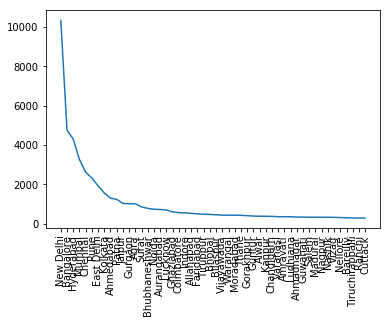

<Figure size 18000x13680 with 0 Axes>

In [47]:
plt.plot(x.City.value_counts().head(50))
plt.xticks(rotation='vertical')
plt.figure(figsize=(250,190))
plt.subplots_adjust(bottom=0.5)
plt.show()

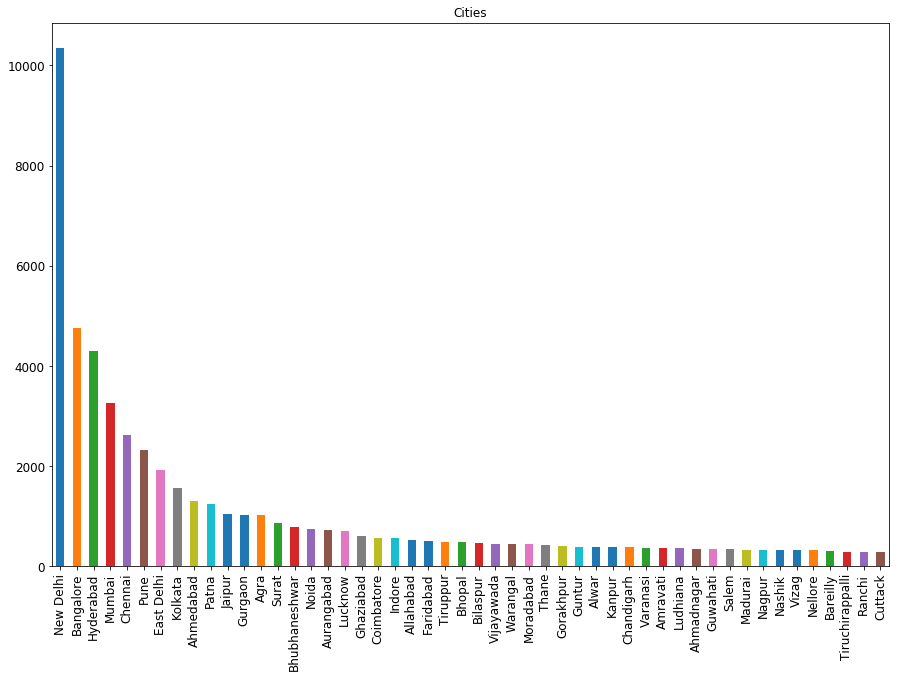

In [48]:
citiy= cities[:50]
citiy.plot.bar(rot=90, title='Cities', figsize=(15,10), fontsize=12)

# Relating City column with Disposition

In [49]:
x=result[['City','Disposition']] 
cd=x.groupby(['Disposition']).City.value_counts()

In [50]:
cd1=cd[:50]
cd1.sort_values(ascending=False)

Disposition                                          City                        
CDR disposition-Not Contactable-Ringing No Response  New Delhi                       82
                                                     Bangalore                       36
                                                     Mumbai                          26
                                                     Pune                            14
CDR disposition-Not Contactable                      New Delhi                       11
                                                     Bangalore                        3
                                                     Chennai                          3
CDR Disposition - Not Contactable                    New Delhi                        3
CDR disposition-Not Contactable                      Mumbai                           2
                                                     Ambur                            2
                                      

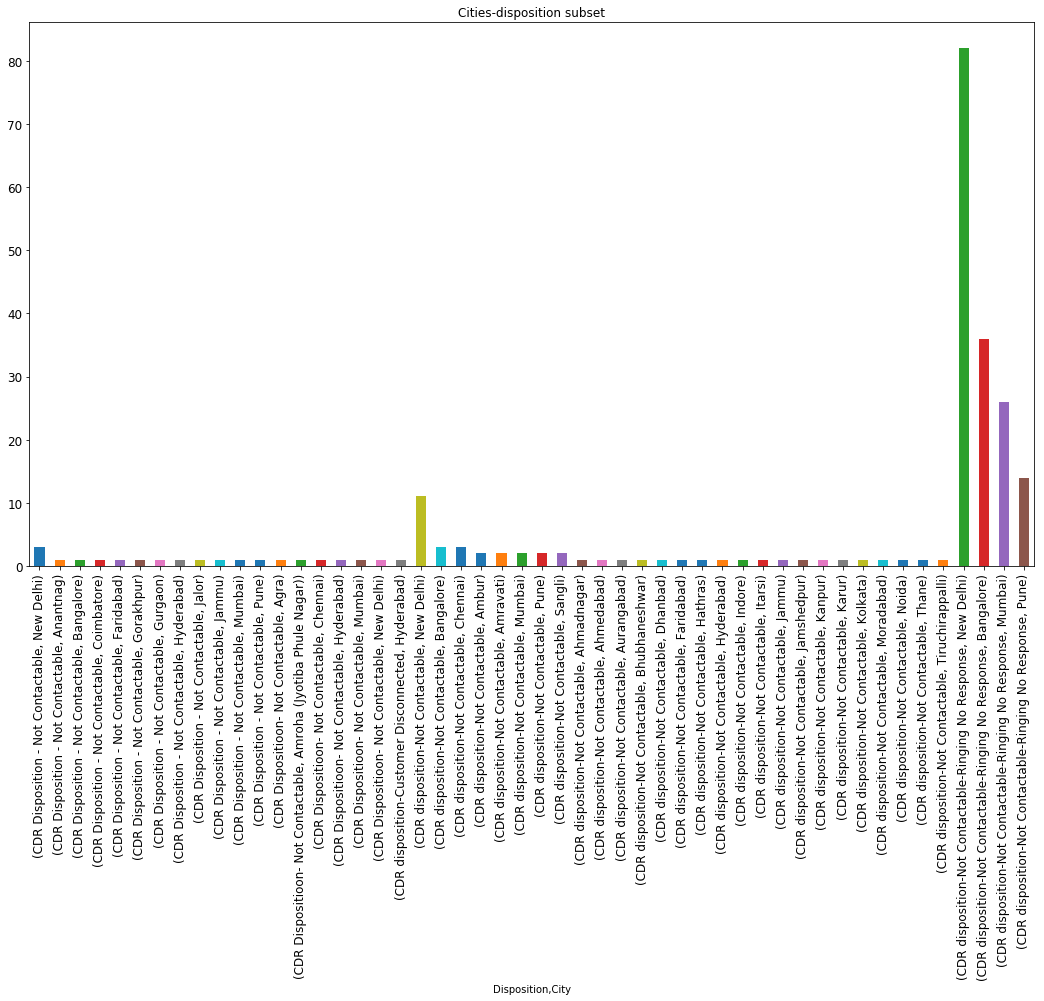

In [51]:
cd1.plot.bar(rot=90, title='Cities-disposition subset', figsize=(18,10), fontsize=12)

# Relating Referer column with disposition

In [52]:
x=result[['Referer','Disposition']] 
x.groupby(['Disposition']).Referer.value_counts()

Disposition                                           Referer                               
CDR Disposition - Not Contactable                     Savings Account-70 percent                   8
                                                      Savings Account customizable                 3
                                                      Yes First                                    2
                                                      Savings Account-SeniorcitizenFD              1
CDR Dispositioon- Not Contactable                     Savings Account customizable                 4
                                                      Savings Account-70 percent                   2
CDR disposition-Customer Disconnected                 Savings Account-6 percent                    1
CDR disposition-Not Contactable                       Savings Account customizable                23
                                                      Savings Account-70 percent                  1

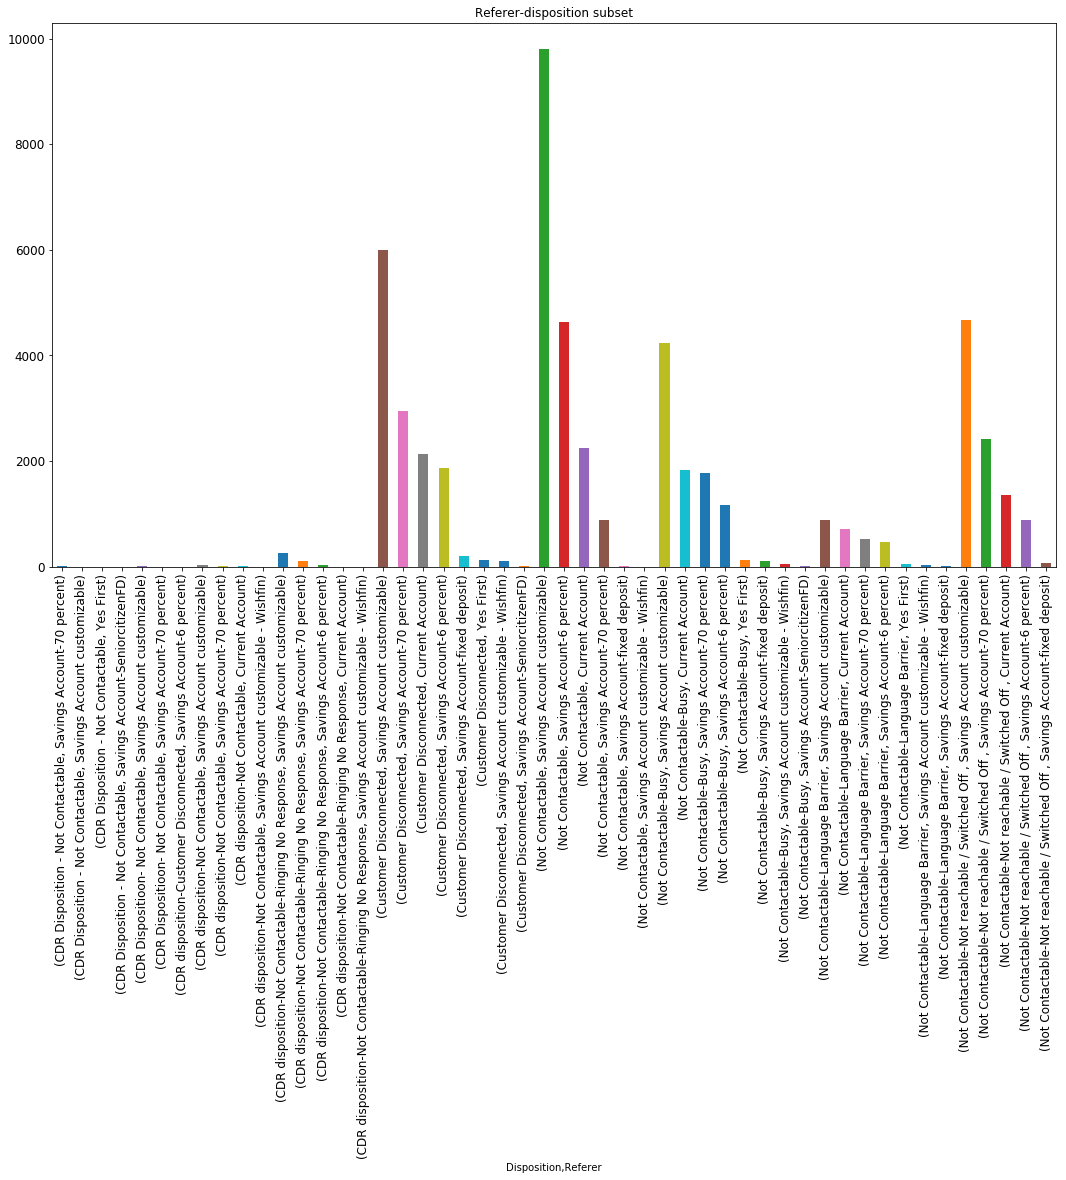

In [53]:
cd=x.groupby(['Disposition']).Referer.value_counts()
cd1 = cd[:50]
cd1.plot.bar(rot=90, title='Referer-disposition subset', figsize=(18,10), fontsize=12)

# Relating Campaign column with Disposition

In [54]:
x=result[['Campaign','Disposition']] 
x.groupby(['Disposition']).Campaign.value_counts()

Disposition                            Campaign                                                         
CDR Disposition - Not Contactable      mailer_valueleaf_70percent_SA-1269                                   4
                                       mailer_valueleaf_70percent_SA-1225                                   2
                                       mailer_valueleaf_70percent_SA-1267                                   2
                                       mailer_ventes_6percent_SA_54_-affiliate                              2
                                       Search_SQR_PAN_India_Brand_Yes_Insta_Mobile_Exact_New_LP-google      1
                                       YESBANK_FD                                                           1
                                       YES_First_Savings                                                    1
                                       nativeads_columbia_yesfirst                                          1
CDR Dispositioo

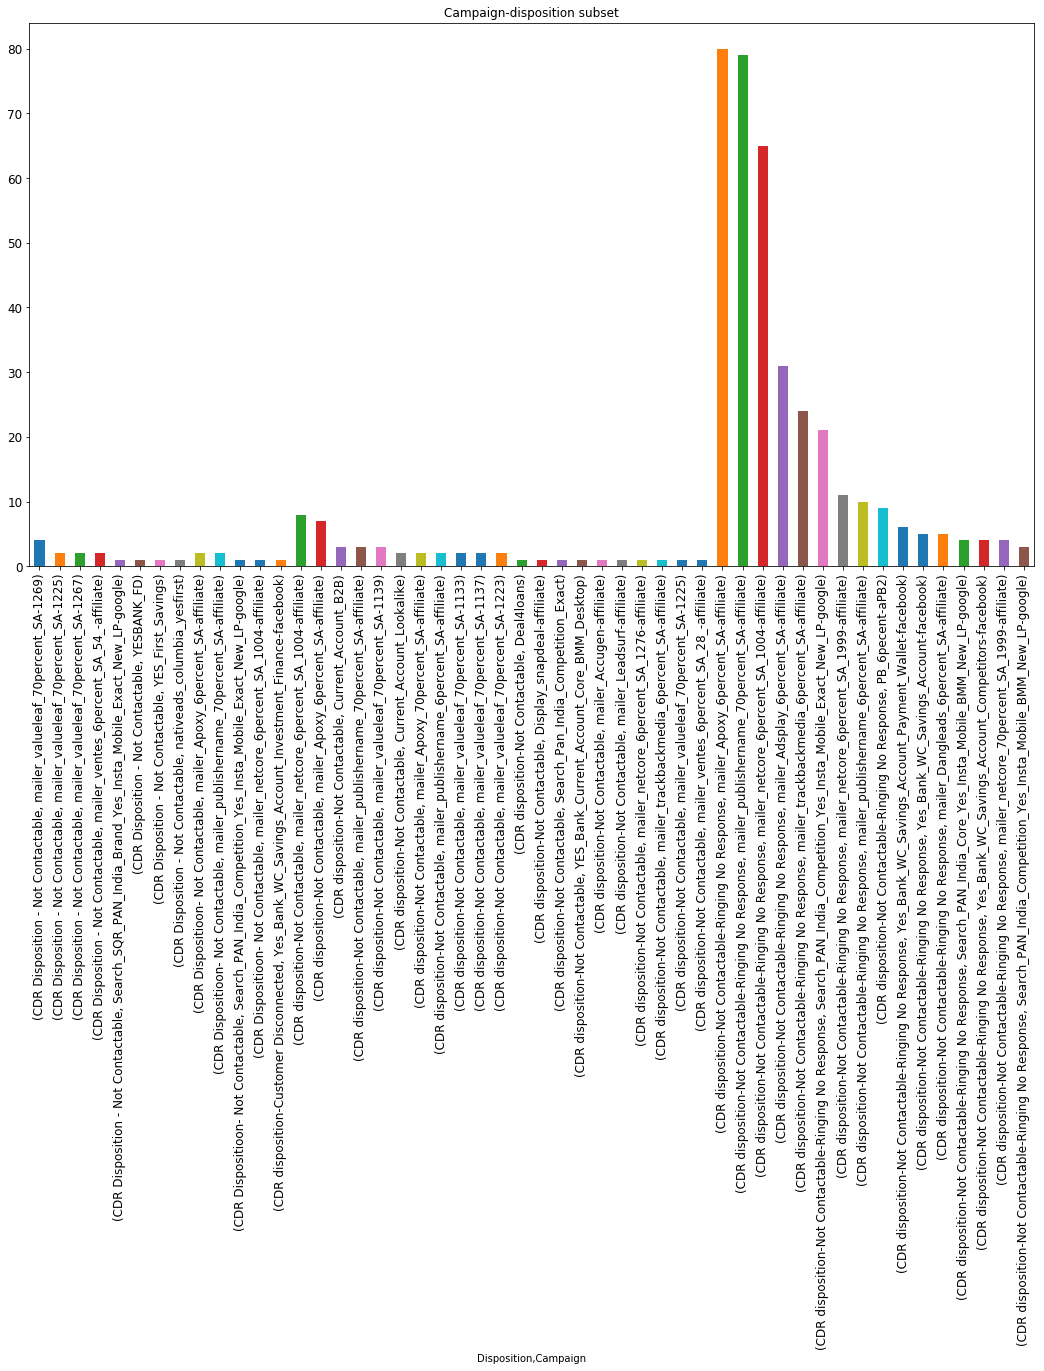

In [55]:
cd=x.groupby(['Disposition']).Campaign.value_counts()
cd1 = cd[:50]
#plotted each Campaign with it disposition column value
cd1.plot.bar(rot=90, title='Campaign-disposition subset', figsize=(18,10), fontsize=12)

# Relating Interested_in column with Disposition

In [56]:
x=train[['Interested_in','Disposition']] 
x.groupby(['Disposition']).Interested_in.value_counts()

Disposition                                           Interested_in                                                       
CDR disposition-Not Contactable-Ringing No Response   ,Current Account                                                          2
                                                      ,Credit Card,Loans,Current Account,Trading Account                        1
                                                      Saving Account                                                            1
Customer Disconnected                                 ,Credit Card                                                            204
                                                      ,Current Account                                                        148
                                                      Saving Account                                                          132
                                                      ,Trading Account                           

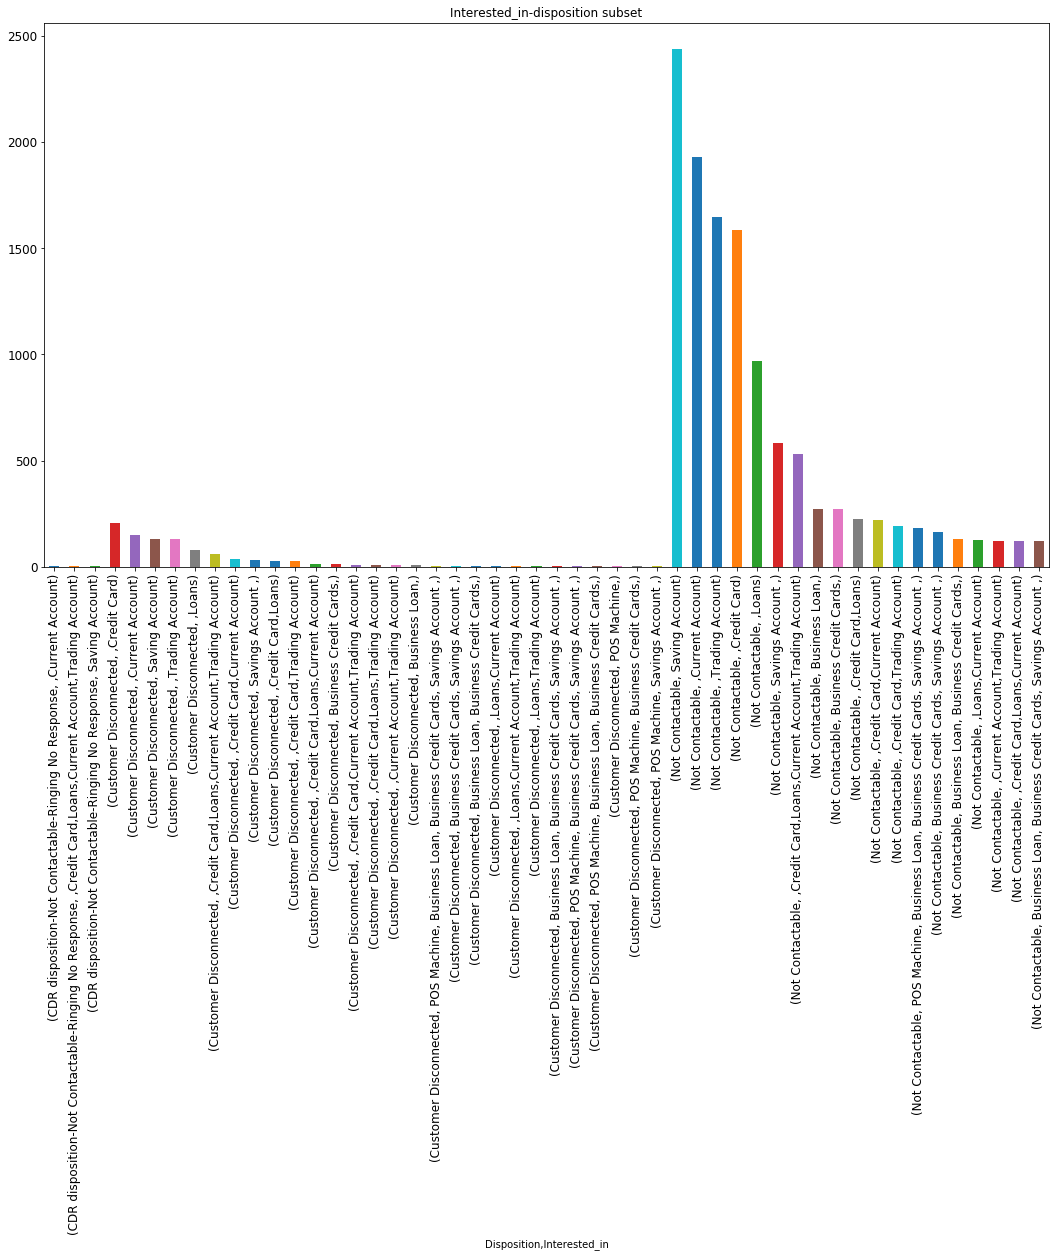

In [57]:
cd=x.groupby(['Disposition']).Interested_in.value_counts()
cd1 = cd[:50]
#plotted each Campaign with it disposition column value
cd1.plot.bar(rot=90, title='Interested_in-disposition subset', figsize=(18,10), fontsize=12)